# <span style="color:navy"> Numerical Simulation Laboratory

# <span style="color:orange"> Numerical Exercises 01

### <span style="color:black"> Exercise 01.1 </span>
a) The goal of the exercise was to make an evaluation of $\langle r \rangle = \int_0^1 r dr = \frac{1}{2}$. 
I used a total of *M = 1000000* throws, divided in *N = 1000* blocks.
The value of the integral for each block is calculated as the mean of *L = M/N = 1000* values uniformly extracted in the interval $I = [0, 1)$.

In order not to use improperly the memory, each single exctraction was summed with the previous one and only after *L* extraction the mean is calculated. 
A similar process is applied to the blocks, so the result of each block are cumulated and the mean of the first *i* block (with its error) is written on a file, for *i = 1, 2... N*.

The figure below shows the difference between the result of the evaluation and the analitic value of $\langle r \rangle$ in function of the number of throws, each with its errorbar. As expected this the difference converges to *0* as the number of throws increases. In red it's marked the value of $\langle r \rangle$, while in blue are the error bars.  

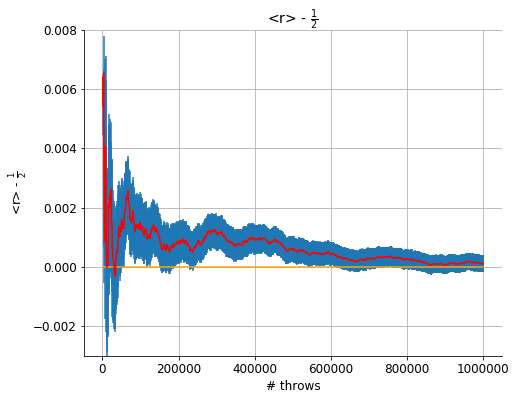

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure (figsize=(7.5,6))
n, r , error = np.loadtxt ('Ex01.1/Average.out', usecols=(0, 1, 2), delimiter='\t', unpack= True)
plt.errorbar (n, r, yerr=error, c= 'red', ecolor='#1f77b4')
plt.plot(n, np.zeros(1000), c='orange')
plt.title (r'<r> - $\frac{1}{2}$')
plt.xlabel ('# throws')
plt.ylabel (r'<r> - $\frac{1}{2}$')
plt.ylim (-0.003, 0.008)
plt.grid(True)

plt.show()

b) The second part of the exercise was similar to the first one, but this time the integral to evaluate was $\sigma^2 = \int_0^1 (r-\frac{1}{2})^2 dr = \frac{1}{12}$.  
I used the same value for *M, N* as before, and the same procedure, but the cumulated value was $r-\frac{1}{2}$ with *r* random number in $I = [0, 1)$.

The figure below again shows the differece between the evaluated and the expected value of $\sigma^2$, as function of the number of throws, each value with its uncertanties. Again in red it's marked the value of the integral, while in blue are the errorbars.

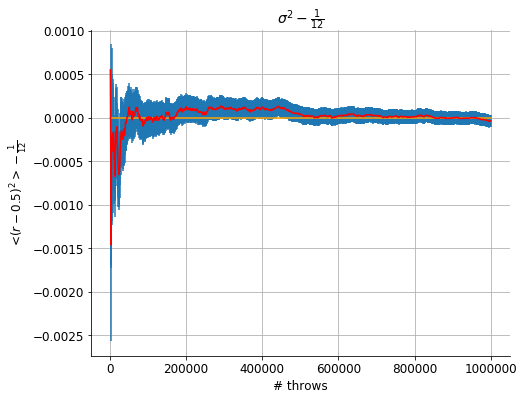

In [2]:
plt.figure (figsize=(7.5,6))
x, f , error = np.loadtxt ('Ex01.1/Sigma2.out', usecols=(0, 1, 2), delimiter='\t', unpack= True)
plt.errorbar (x, f, yerr=error, c= 'red', ecolor='#1f77b4')
plt.plot(n, np.zeros(1000), c='orange')
plt.title (r'$\sigma^2 - \frac{1}{12}$')
plt.xlabel ('# throws')
plt.ylabel (r'<$(r-0.5)^2> - \frac{1}{12}$')
plt.grid(True)

plt.show()

c) The last part of the exercise was to implement the $\chi^2$ test on the *r* values, in order to confirm or reject the hypothesis that they were extracted from a uniform distribution. This test was repeated 100 times.
The formula to calculate the $\chi^2$ is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
where M is the number of sub-interval in which $I$ has been divided (in my implementation ${\scriptsize M = 100}$), $n$ is the amount of extracted number (*10000*) and $n_i$ is the count of numbers extracted in each sub-interval.

To do that I used an array which while extracting the random numbers increases the counter of the corresponding sub-interval (i.e. the array index, ${\scriptsize j}$, is associated to the sub-interval ${\scriptsize I_j = \left[\frac{j}{n/M}, \frac{j+1}{n/M}\right)}$). After using the counter *j* for the calculation it was set to zero again, ready for another test.

The result are shown in the figure below, as it can be seen the they are similar to *100*, which was the expected value if $1/M$ is small.

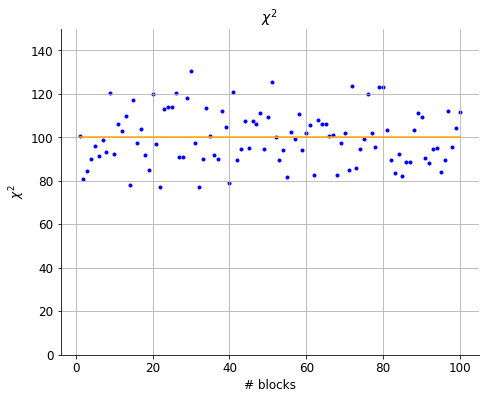

In [3]:
plt.figure (figsize=(7.5,6))
x, f  = np.loadtxt ("Ex01.1/ChiSquared.out", usecols=(0, 1), delimiter='\t', unpack= True)
plt.ylim(0,150)
plt.scatter (x, f, c="blue", marker='.')
ft = np.full(100, 100)
plt.plot (x, ft, c="orange")
plt.title (r'$\chi^2$')
plt.xlabel ('# blocks')
plt.ylabel (r'$\chi^2$')
plt.grid(True)

plt.show()

### <span style="color:black"> Exercise 01.2 </span>
The goal of was to implement two other probability distribution beside the uniform one, using the method of the inversion of the cumulative distribution: the exponential and the Cauchy-Lorentz.

For the *Central Limit Theorem* by summing N values exctracted by the uniform and the exponential distributions the new obtained distribution should converge to a Normal distribution. To verify this, I summed the exctracted values with N = 1, 2, 10 and 100.

For filling the histograms I wrote the class *Histo* which in the constructor takes the typical parameters of an histogram (i.e number of bins, source of data, eventually the range in which consider valid the data) and fills the vector of left edges of the bins and vector of number of counts in the given bin. The contructor also set the value of *bin_size* parameter.
After constructing the object it is possible to use the method *Normalize()* to normalize the histogram and then the method *Print_norm()* in order to write on a file the left edge and counts of each bin.

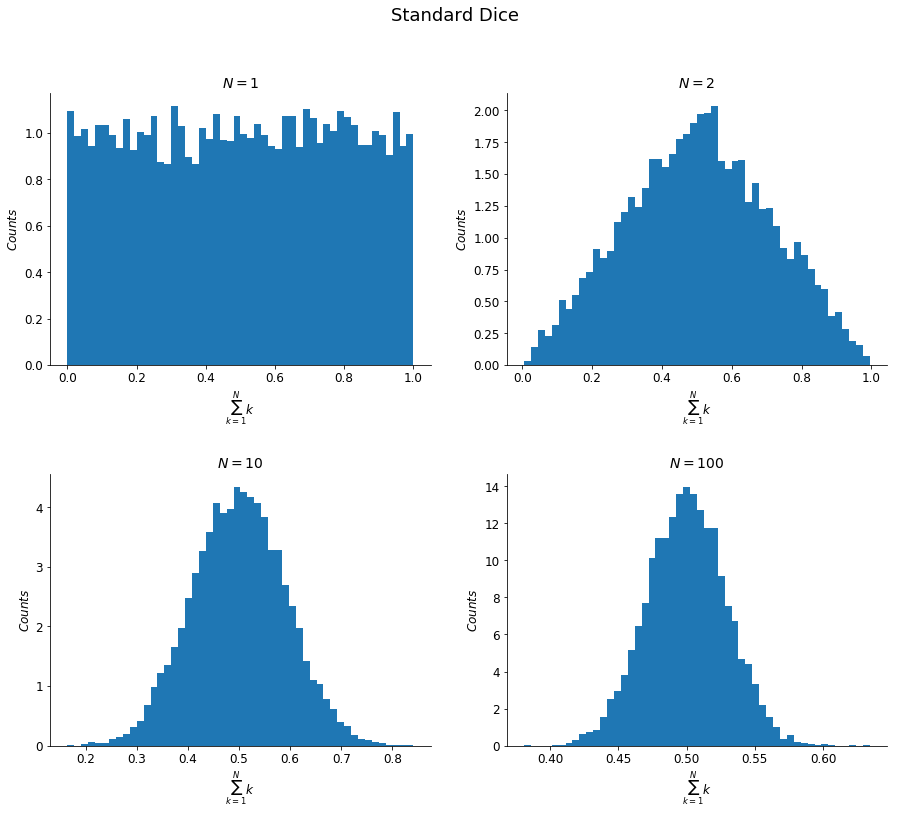

In [4]:
x, y = np.loadtxt ("Ex01.2/N1_histo.out", skiprows=0, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=1, delimiter='\t')
f, axarr = plt.subplots (2,2, figsize=(15,12))
axarr[0,0].bar(x, y, steps[0], align='edge')
axarr[0,0].set_title(r'$N=1$')


x, y = np.loadtxt ("Ex01.2/N2_histo.out", skiprows=0, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[0,1].bar(x, y, steps[1], align='edge')
axarr[0,1].set_title(r'$N=2$')

x, y = np.loadtxt ("Ex01.2/N10_histo.out", skiprows=0, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[1,0].bar(x, y, steps[2], align='edge')
axarr[1,0].set_title(r'$N=10$')

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=0, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[1,1].bar(x, y, steps[3], align='edge')
axarr[1,1].set_title(r'$N=100$')

for i in range(2):
    for t in range(2):
        axarr[i,t].set_xlabel(r'$\sum_{k=1}^Nk$')
        axarr[i,t].set_ylabel(r'$Counts$')
f.suptitle("Standard Dice")
plt.show()

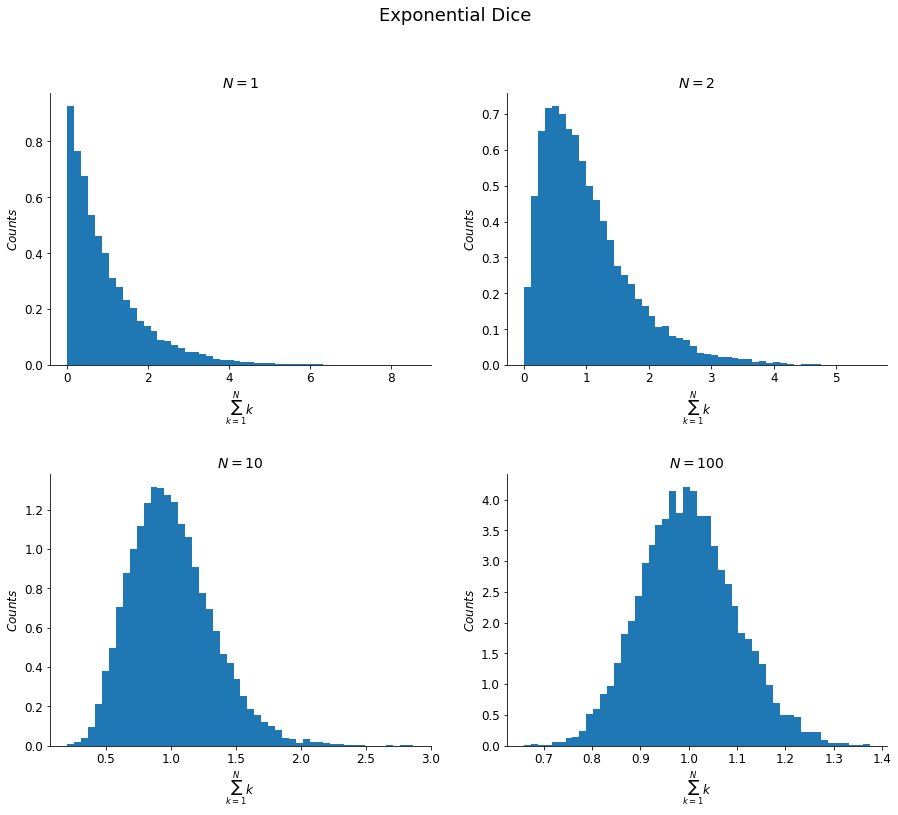

In [5]:
x, y = np.loadtxt ("Ex01.2/N1_histo.out", skiprows=50, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=2, delimiter='\t')
f, axarr = plt.subplots (2,2, figsize=(15,12))
axarr[0,0].bar(x, y, steps[0], align='edge')
axarr[0,0].set_title(r'$N=1$')


x, y = np.loadtxt ("Ex01.2/N2_histo.out", skiprows=50, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[0,1].bar(x, y, steps[1], align='edge')
axarr[0,1].set_title(r'$N=2$')

x, y = np.loadtxt ("Ex01.2/N10_histo.out", skiprows=50, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[1,0].bar(x, y, steps[2], align='edge')
axarr[1,0].set_title(r'$N=10$')

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=50, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
axarr[1,1].bar(x, y, steps[3], align='edge')
axarr[1,1].set_title(r'$N=100$')

for i in range(2):
    for t in range(2):
        axarr[i,t].set_xlabel(r'$\sum_{k=1}^Nk$')
        axarr[i,t].set_ylabel(r'$Counts$')
f.suptitle("Exponential Dice")
plt.show()

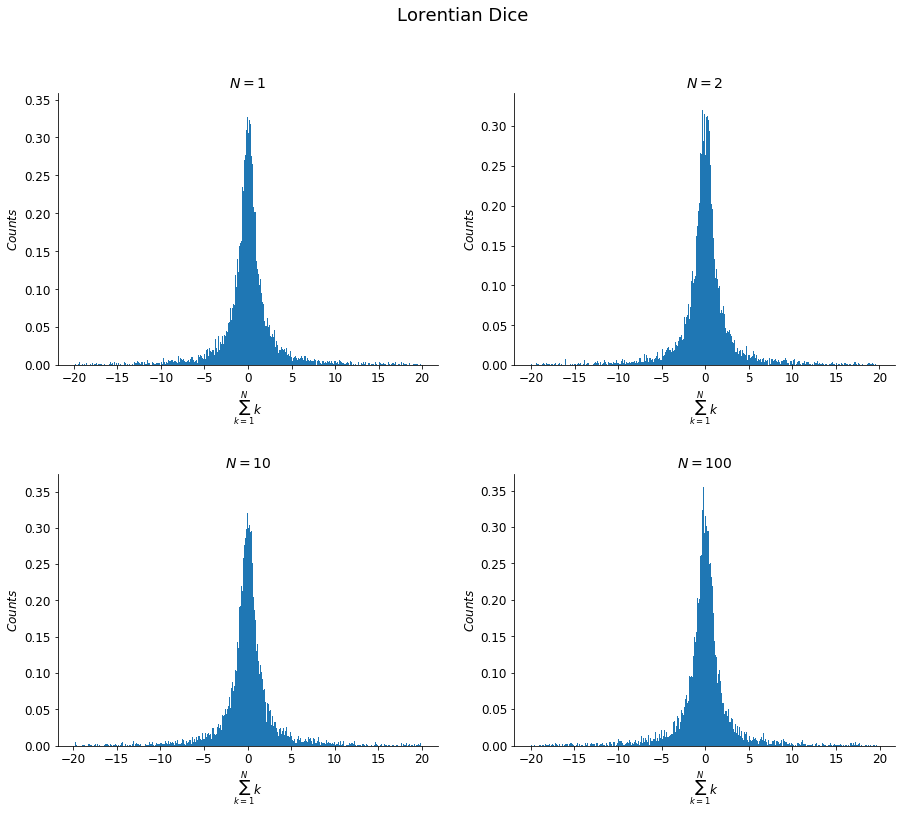

In [6]:
x, y = np.loadtxt ("Ex01.2/N1_histo.out", skiprows=100, usecols=(0, 1), delimiter='\t', max_rows=500, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=3, delimiter='\t')
f, axarr = plt.subplots (2,2, figsize=(15,12))
axarr[0,0].bar(x, y, steps[0], align='edge')
axarr[0,0].set_title(r'$N=1$')

x, y = np.loadtxt ("Ex01.2/N2_histo.out", skiprows=100, usecols=(0, 1), delimiter='\t', max_rows=500, unpack= True)
axarr[0,1].bar(x, y, steps[1], align='edge')
axarr[0,1].set_title(r'$N=2$')

x, y = np.loadtxt ("Ex01.2/N10_histo.out", skiprows=100, usecols=(0, 1), delimiter='\t', max_rows=500, unpack= True)
axarr[1,0].bar(x, y, steps[2], align='edge')
axarr[1,0].set_title(r'$N=10$')

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=100, usecols=(0, 1), delimiter='\t', max_rows=500, unpack= True)
axarr[1,1].bar(x=x, height=y, width=steps[3], align='edge')
axarr[1,1].set_title(r'$N=100$')

for i in range(2):
    for t in range(2):
        axarr[i,t].set_xlabel(r'$\sum_{k=1}^Nk$')
        axarr[i,t].set_ylabel(r'$Counts$')
f.suptitle("Lorentian Dice")
plt.show()

For the uniform and exponential distributions the hypothesys of the *Central Limit Theorem* are true, thus the histograms  with *N = 100* represent a Gaussian distribution.
The Cauchy-Lorentz distribution, instead, has infinite variance so it does not fit *Central Limit Theorem* hypothesis, but is stable, so the histogram whith *N = 100* still look like a Lorentian.
It is possible to fit them with a Gaussian or Lorentzian curve, obtaining:

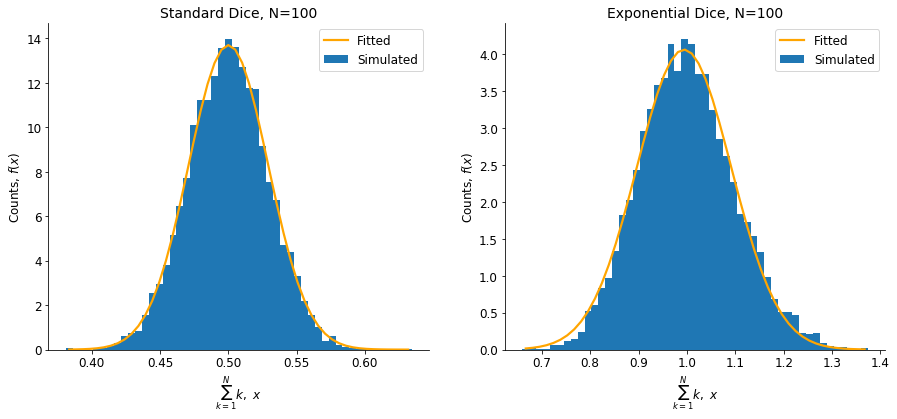

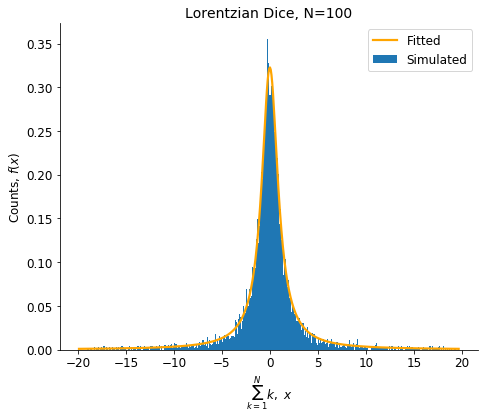

In [7]:
from scipy.optimize import curve_fit

def g(x,a,b,c):  # defining the Gaussian for fit
    return a * np.exp(-b*(x+c)**2)
def l(x,a,b): #defining Cauchy-Lorentz for fit
    return a*1/(x**2+b)

f, axarr = plt.subplots (1, 2, figsize=(15,6))

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=0, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=1, delimiter='\t')
axarr[0].bar(x, y, steps[3], label='Simulated', align='edge')
axarr[0].set_title(r'Standard Dice, N=100')

#fitting function
x = x + steps[3]*0.5 #adjusting the value to the center of bin
p_opt, p_cov = curve_fit(g, x, y)
y_fit = g(x,p_opt[0],p_opt[1],p_opt[2])
axarr[0].plot(x,y_fit,c='orange',lw=2.2, label='Fitted')

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=50, usecols=(0, 1), delimiter='\t', max_rows=50, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=2, delimiter='\t')
axarr[1].bar(x, y, steps[3], label = 'Simulated', align='edge')
axarr[1].set_title(r'Exponential Dice, N=100')

#fitting function
x = x + steps[3]*0.5 #adjusting the value to the center of bin
p_opt, p_cov = curve_fit(g, x, y)
y_fit = g(x,p_opt[0],p_opt[1],p_opt[2])
axarr[1].plot(x,y_fit,c='orange',lw=2.2, label='Fitted') 

for i in range(2):
    axarr[i].set_xlabel(r'$\sum_{k=1}^Nk,$ $x$')
    axarr[i].set_ylabel(r'Counts, $f(x)$')
    axarr[i].legend()


plt.figure(figsize=(7.5,6))

x, y = np.loadtxt ("Ex01.2/N100_histo.out", skiprows=100, usecols=(0, 1), delimiter='\t', max_rows=500, unpack= True)
steps = np.loadtxt ("Ex01.2/Steps.out", usecols=3, delimiter='\t')
plt.bar(x, y, steps[3], label='Simulated', align='edge')
plt.title(r'Lorentzian Dice, N=100')
plt.xlabel(r'$\sum_{k=1}^Nk,$ $x$')
plt.ylabel(r'Counts, $f(x)$')

#fitting function
x = x + steps[3]*0.5 #adjusting the value to the center of bin
p_opt, p_cov = curve_fit(l, x, y)
y_fit = l(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit,c='orange',lw=2.2,label='Fitted') 
plt.legend()

plt.show()

### <span style="color:black"> Exercise 01.3 </span>

###### <span style="color:black"> The Buffon's Experiment </span>
The goal of this experiment is to estimate $\pi$ by throwing a needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (with $d > L$).
Performing $N_{thr}$, and observing $N_{hit}$ times the needle landing on a line the value of $\pi$ is:

$$\pi = \frac{2L}{dP} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{dN_{hit}}$$

To simulate this process in my code a uniform random number between *1* and *10* was extracted, representing the $x$ coordinate of the needle's first end ($x_{1}$). If we choose the reference system with $y$ axis parallel to the straight lines in the plane, then it is not necessary to know the $y$ coordinate of the points, as the problem is symmetric for vertical traslations. 
The $x$ coordinate of the needle's second end ($x_{2}$) has to be exctracted simulating the fact that this second end should be at a distance $L$ from the first. For this reason it was extracted an angle $\theta$ uniformly in 
$[0, 2\pi]$, thus the $x_{2}$ is the projection of the second end onto the $x$ axis, giving $x_{2} = x_{1} + L\cos{\theta}$.
Now the condition for the needle to land on a line is that the two ends have $x$ coordinates one over and one before a given line, which computationally is achieved if the integer division between the two coordinates and the distance separating the line $d$ gives two different results.
In this case an accumulator $N_{hit}$ is incremented.

In order not to use a tabulated value of $\pi$ to sample the angle $\theta$, it has been necessary to implement a uniform angle sampling method.
This has been achieved by sampling uniformly the upper half circle (extracting $x$ and $y$ coordinates between $[-1,1]$ and rejecting all points with radius $r = \sqrt{x^2+y^2} > 1$) and calculating the $\arccos{\frac{x}{r}}$, which gives a uniform number in $[0, \pi]$. Then, by scaling for a factor $2$ the wished probability is obtained.

I used as needle lenght $L = 0.75$ and lines at disance $d = 1.0$.
I performed the experiment with $M = 1000000$ throws, divided in $N = 1000$ blocks, where the number of throws per block is $N_{thr}$. The following picture shows the value of $\pi$ in function of number of throws, each with its statistical uncertainty.

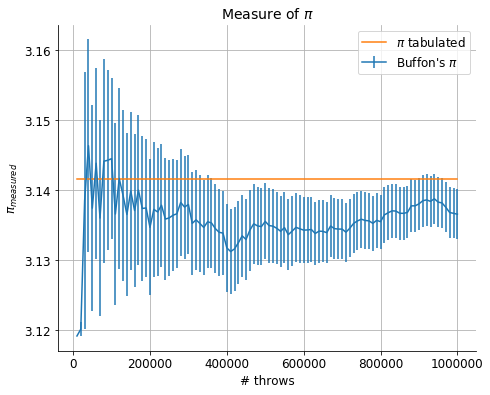

In [8]:
plt.figure(figsize=(7.5, 6))
n, pi, error = np.loadtxt("Ex01.3/Pi.out", usecols=(0, 1, 2), delimiter='	', unpack=True)
plt.errorbar(n, pi, yerr=error, label = "Buffon's $\pi$")
pi_value = np.full(100,np.pi)
plt.plot(n, pi_value, label ='$\pi$ tabulated' )
plt.title(r'Measure of $\pi$')
plt.xlabel("# throws")
plt.ylabel(r'$\pi_{measured}$')
plt.legend()

plt.grid()
plt.show()